In [1]:
from selenium import webdriver
from time import sleep
import numpy as np
import pandas as pd
import requests
import re

In [2]:
path = './chromedriver'

In [3]:
# open the browser
browser = webdriver.Chrome(executable_path=path)


C:\Users\hp\AppData\Local\Temp/ipykernel_12312/2303557323.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Chrome(executable_path=path)


In [4]:
# load the webpage
browser.get('https://www.amazon.in')


In [5]:
browser.maximize_window()

In [6]:
# get the input elements
input_search = browser.find_element_by_id('twotabsearchtextbox')
search_button = browser.find_element_by_xpath("(//input[@type='submit'])[1]")

C:\Users\hp\AppData\Local\Temp/ipykernel_12312/2948291314.py:2: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  input_search = browser.find_element_by_id('twotabsearchtextbox')
C:\Users\hp\AppData\Local\Temp/ipykernel_12312/2948291314.py:3: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  search_button = browser.find_element_by_xpath("(//input[@type='submit'])[1]")


In [7]:
# send the input to the webpage
input_search.send_keys("smart phones under 10000")
sleep(1)
search_button.click()

In [8]:
mobiles = []

for i in range(10):
   
    products=browser.find_elements_by_xpath("//div[@class='a-section a-spacing-small a-spacing-top-small']")
    
    
    for product in products:
        try: 
            
            price = None
            rating = None
          
            title = product.find_element_by_xpath(".//span[@class='a-size-medium a-color-base a-text-normal']")

            try:
                price=  product.find_element_by_xpath(".//span[@class='a-price-whole']")
            except:
                pass
            try:
                rating=product.find_element_by_xpath(".//span[@class='a-size-base s-underline-text']")
            except:
                pass

            if price:
                price = price.text
            if rating:
                rating = rating.text
            mobile = {"title" : title.text, "price" : price, "rating" : rating}
            print(mobile)
            mobiles.append(mobile)
            
        except:
            pass

    print(len(mobiles))
    next_button = browser.find_element_by_xpath("//a[@class='s-pagination-item s-pagination-next s-pagination-button s-pagination-separator']")
    next_button.click()
    sleep(10)

C:\Users\hp\AppData\Local\Temp/ipykernel_12312/364656719.py:5: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  products=browser.find_elements_by_xpath("//div[@class='a-section a-spacing-small a-spacing-top-small']")
E:\software\python-3.10.1\lib\site-packages\selenium\webdriver\remote\webelement.py:393: UserWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  warnings.warn("find_element_by_* commands are deprecated. Please use find_element() instead")


{'title': 'NOKIA C20+ TA-1366 DS 2/32 BL', 'price': '7,999', 'rating': '279'}
{'title': 'Samsung Galaxy M12 (White,4GB RAM, 64GB Storage) 6000 mAh with 8nm Processor | True 48 MP Quad Camera | 90Hz Refresh Rate', 'price': '10,499', 'rating': '112,847'}
{'title': 'Redmi 9A (Midnight Black 2GB RAM 32GB Storage) | 2GHz Octa-core Helio G25 Processor | 5000 mAh Battery', 'price': '7,499', 'rating': '141,895'}
{'title': 'Redmi 9 Activ (Metallic Purple, 4GB RAM, 64GB Storage)', 'price': '9,999', 'rating': '139,642'}
{'title': 'realme narzo 50i (Mint Green, 4GB RAM+64GB Storage) - with No Cost EMI/Additional Exchange Offers', 'price': '8,999', 'rating': '8,550'}
{'title': 'Redmi 9A (Nature Green, 3GB Ram, 32GB Storage) | 2GHz Octa-core Helio G25 Processor', 'price': '7,999', 'rating': '141,895'}
{'title': 'Redmi 9A(Midnight Black 3GB RAM 32GB Storage) | 2GHz Octa-core Helio G25 Processor | 5000 mAh Battery', 'price': '7,999', 'rating': '141,895'}
{'title': 'I KALL Z3 Smartphone (Green, 4GB, 32

C:\Users\hp\AppData\Local\Temp/ipykernel_12312/364656719.py:37: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  next_button = browser.find_element_by_xpath("//a[@class='s-pagination-item s-pagination-next s-pagination-button s-pagination-separator']")


{'title': 'Samsung Galaxy M12 (Blue,4GB RAM, 64GB Storage) 6000 mAh with 8nm Processor | True 48 MP Quad Camera | 90Hz Refresh Rate', 'price': '10,499', 'rating': '112,847'}
{'title': 'Nokia C20 Plus, 6.5" HD+ Screen, 4950 mAh Battery, 2 + 32GB Memory (Dark Grey)', 'price': '7,999', 'rating': '279'}
{'title': 'Jio Phone Next 32 GB ROM, 2 GB RAM, Blue, Smartphone', 'price': '5,890', 'rating': '3'}
{'title': 'I KALL Z1 Smartphone (5.5" Display, 4GB, 32GB, Dual Sim) (Blue)', 'price': '5,399', 'rating': None}
{'title': 'I KALL Z8 Smartphone (Blue, 3GB, 16GB)', 'price': '4,899', 'rating': '1'}
{'title': 'I KALL Z8 Smartphone (Cyan, 3GB, 16GB)', 'price': '4,899', 'rating': '1'}
{'title': 'Lava Z3 Striped Cyan(3GB RAM, 32GB Storage)', 'price': '7,499', 'rating': '136'}
{'title': 'I KALL Z7 Smartphone (6.26" HD Display, 4GB, 32GB) (Grey)', 'price': '6,399', 'rating': None}
{'title': 'Jio Phone Next 32 GB ROM, 2 GB RAM, Blue Smartphone', 'price': '5,890', 'rating': '14'}
{'title': 'Micromax X41

In [9]:
#Entiere data in single list
mobiles[:10]

[{'title': 'NOKIA C20+ TA-1366 DS 2/32 BL', 'price': '7,999', 'rating': '279'},
 {'title': 'Samsung Galaxy M12 (White,4GB RAM, 64GB Storage) 6000 mAh with 8nm Processor | True 48 MP Quad Camera | 90Hz Refresh Rate',
  'price': '10,499',
  'rating': '112,847'},
 {'title': 'Redmi 9A (Midnight Black 2GB RAM 32GB Storage) | 2GHz Octa-core Helio G25 Processor | 5000 mAh Battery',
  'price': '7,499',
  'rating': '141,895'},
 {'title': 'Redmi 9 Activ (Metallic Purple, 4GB RAM, 64GB Storage)',
  'price': '9,999',
  'rating': '139,642'},
 {'title': 'realme narzo 50i (Mint Green, 4GB RAM+64GB Storage) - with No Cost EMI/Additional Exchange Offers',
  'price': '8,999',
  'rating': '8,550'},
 {'title': 'Redmi 9A (Nature Green, 3GB Ram, 32GB Storage) | 2GHz Octa-core Helio G25 Processor',
  'price': '7,999',
  'rating': '141,895'},
 {'title': 'Redmi 9A(Midnight Black 3GB RAM 32GB Storage) | 2GHz Octa-core Helio G25 Processor | 5000 mAh Battery',
  'price': '7,999',
  'rating': '141,895'},
 {'title'

In [10]:
#Dataframe creation
df = pd.DataFrame(mobiles)

In [11]:
df.head()

,title,price,rating
0,NOKIA C20+ TA-1366 DS 2/32 BL,"7,999",279
1,"Samsung Galaxy M12 (White,4GB RAM, 64GB Storag...","10,499","112,847"
2,Redmi 9A (Midnight Black 2GB RAM 32GB Storage)...,"7,499","141,895"
3,"Redmi 9 Activ (Metallic Purple, 4GB RAM, 64GB ...","9,999","139,642"
4,"realme narzo 50i (Mint Green, 4GB RAM+64GB Sto...","8,999","8,550"


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   218 non-null    object
 1   price   205 non-null    object
 2   rating  181 non-null    object
dtypes: object(3)
memory usage: 5.2+ KB


In [13]:
df.describe()

,title,price,rating
count,218,205,181
unique,179,88,81
top,NOKIA C20+ TA-1366 DS 2/32 BL,"7,999","141,895"
freq,3,13,10


In [14]:
df.to_csv('mobile_info.csv', index = False)

In [15]:
#Using regex to extract details of mobiles

In [16]:
df = pd.read_csv("mobile_info.csv")
df


,title,price,rating
0,NOKIA C20+ TA-1366 DS 2/32 BL,"7,999",279
1,"Samsung Galaxy M12 (White,4GB RAM, 64GB Storag...","10,499","112,847"
2,Redmi 9A (Midnight Black 2GB RAM 32GB Storage)...,"7,499","141,895"
3,"Redmi 9 Activ (Metallic Purple, 4GB RAM, 64GB ...","9,999","139,642"
4,"realme narzo 50i (Mint Green, 4GB RAM+64GB Sto...","8,999","8,550"
...,...,...,...
213,"realme C11 2021 (Cool Blue, 4GB RAM, 64GB Stor...",NaN,107
214,"Micromax X741 (Black, Ultra Bright LED Light, ...",NaN,57
215,Xifo Kekai Pro Max 6.8 inch (3 GB 32 GB) 4G Vo...,"6,484",3
216,Lava A1(Candy Blue) -Dual Sim |Call Blink Notf...,"1,066",103


In [17]:
# Extract brand name

regex ='^\S\w+\s'

df['Brand'] = df['title'].apply(lambda x : re.findall(regex, x))


In [18]:
#Extraction of storage frpm title

regex = r'[\d]+GB+[\s]+[\w\s]+[Storage]'

df['Storage'] = df['title'].apply(lambda x : re.findall(regex, x))


In [19]:
#Extracting Ram storage of mobile
 
regex = r'[\d]+GB+[\s]+[\w\s]+[RAM]'

df['RAM'] = df['title'].apply(lambda x : re.findall(regex, x))



In [20]:
#Extracting color of the mobile from title column

regex='\bblack|Blue|Grey|White|Red|Purple|Silver'
df['color']=df['title'].apply(lambda x:re.findall(regex,x))

In [21]:
df

,title,price,rating,Brand,Storage,RAM,color
0,NOKIA C20+ TA-1366 DS 2/32 BL,"7,999",279,[NOKIA ],[],[],[]
1,"Samsung Galaxy M12 (White,4GB RAM, 64GB Storag...","10,499","112,847",[Samsung ],[64GB Storage],[4GB RAM],[White]
2,Redmi 9A (Midnight Black 2GB RAM 32GB Storage)...,"7,499","141,895",[Redmi ],[2GB RAM 32GB Storage],[2GB RAM],[Red]
3,"Redmi 9 Activ (Metallic Purple, 4GB RAM, 64GB ...","9,999","139,642",[Redmi ],[64GB Storage],[4GB RAM],"[Red, Purple]"
4,"realme narzo 50i (Mint Green, 4GB RAM+64GB Sto...","8,999","8,550",[realme ],[64GB Storage],[4GB RAM],[]
...,...,...,...,...,...,...,...
213,"realme C11 2021 (Cool Blue, 4GB RAM, 64GB Stor...",NaN,107,[realme ],[64GB Storage],[4GB RAM],[Blue]
214,"Micromax X741 (Black, Ultra Bright LED Light, ...",NaN,57,[Micromax ],[],[],[]
215,Xifo Kekai Pro Max 6.8 inch (3 GB 32 GB) 4G Vo...,"6,484",3,[Xifo ],[],[],[Blue]
216,Lava A1(Candy Blue) -Dual Sim |Call Blink Notf...,"1,066",103,[Lava ],[],[],[Blue]


In [22]:
df.Brand = df.Brand.apply(lambda x : ''.join(x))
df.RAM = df.RAM.apply(lambda x : ''.join(x))
df.Storage = df.Storage.apply(lambda x : ''.join(x))
df.color= df.color.apply(lambda x : ''.join(x))

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    218 non-null    object
 1   price    205 non-null    object
 2   rating   181 non-null    object
 3   Brand    218 non-null    object
 4   Storage  218 non-null    object
 5   RAM      218 non-null    object
 6   color    218 non-null    object
dtypes: object(7)
memory usage: 12.0+ KB


In [24]:
df=df.replace({'rating': {'': '', ',': ''}}, regex=True)
df['rating']=pd.to_numeric(df['rating'])


In [25]:
df.fillna(0)
df

,title,price,rating,Brand,Storage,RAM,color
0,NOKIA C20+ TA-1366 DS 2/32 BL,"7,999",279.0,NOKIA,,,
1,"Samsung Galaxy M12 (White,4GB RAM, 64GB Storag...","10,499",112847.0,Samsung,64GB Storage,4GB RAM,White
2,Redmi 9A (Midnight Black 2GB RAM 32GB Storage)...,"7,499",141895.0,Redmi,2GB RAM 32GB Storage,2GB RAM,Red
3,"Redmi 9 Activ (Metallic Purple, 4GB RAM, 64GB ...","9,999",139642.0,Redmi,64GB Storage,4GB RAM,RedPurple
4,"realme narzo 50i (Mint Green, 4GB RAM+64GB Sto...","8,999",8550.0,realme,64GB Storage,4GB RAM,
...,...,...,...,...,...,...,...
213,"realme C11 2021 (Cool Blue, 4GB RAM, 64GB Stor...",NaN,107.0,realme,64GB Storage,4GB RAM,Blue
214,"Micromax X741 (Black, Ultra Bright LED Light, ...",NaN,57.0,Micromax,,,
215,Xifo Kekai Pro Max 6.8 inch (3 GB 32 GB) 4G Vo...,"6,484",3.0,Xifo,,,Blue
216,Lava A1(Candy Blue) -Dual Sim |Call Blink Notf...,"1,066",103.0,Lava,,,Blue


In [26]:
df=df.replace({'price': {'': '', ',': ''}}, regex=True)


In [27]:
df

,title,price,rating,Brand,Storage,RAM,color
0,NOKIA C20+ TA-1366 DS 2/32 BL,7999,279.0,NOKIA,,,
1,"Samsung Galaxy M12 (White,4GB RAM, 64GB Storag...",10499,112847.0,Samsung,64GB Storage,4GB RAM,White
2,Redmi 9A (Midnight Black 2GB RAM 32GB Storage)...,7499,141895.0,Redmi,2GB RAM 32GB Storage,2GB RAM,Red
3,"Redmi 9 Activ (Metallic Purple, 4GB RAM, 64GB ...",9999,139642.0,Redmi,64GB Storage,4GB RAM,RedPurple
4,"realme narzo 50i (Mint Green, 4GB RAM+64GB Sto...",8999,8550.0,realme,64GB Storage,4GB RAM,
...,...,...,...,...,...,...,...
213,"realme C11 2021 (Cool Blue, 4GB RAM, 64GB Stor...",NaN,107.0,realme,64GB Storage,4GB RAM,Blue
214,"Micromax X741 (Black, Ultra Bright LED Light, ...",NaN,57.0,Micromax,,,
215,Xifo Kekai Pro Max 6.8 inch (3 GB 32 GB) 4G Vo...,6484,3.0,Xifo,,,Blue
216,Lava A1(Candy Blue) -Dual Sim |Call Blink Notf...,1066,103.0,Lava,,,Blue


In [31]:
df['p']=pd.to_numeric(['price'])


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   title    218 non-null    object 
 1   price    205 non-null    float64
 2   rating   181 non-null    float64
 3   Brand    218 non-null    object 
 4   Storage  218 non-null    object 
 5   RAM      218 non-null    object 
 6   color    218 non-null    object 
dtypes: float64(2), object(5)
memory usage: 12.0+ KB


In [34]:
df.head()

,title,price,rating,Brand,Storage,RAM,color
0,NOKIA C20+ TA-1366 DS 2/32 BL,7999.0,279.0,NOKIA,,,
1,"Samsung Galaxy M12 (White,4GB RAM, 64GB Storag...",10499.0,112847.0,Samsung,64GB Storage,4GB RAM,White
2,Redmi 9A (Midnight Black 2GB RAM 32GB Storage)...,7499.0,141895.0,Redmi,2GB RAM 32GB Storage,2GB RAM,Red
3,"Redmi 9 Activ (Metallic Purple, 4GB RAM, 64GB ...",9999.0,139642.0,Redmi,64GB Storage,4GB RAM,RedPurple
4,"realme narzo 50i (Mint Green, 4GB RAM+64GB Sto...",8999.0,8550.0,realme,64GB Storage,4GB RAM,


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Data visualization

In [50]:
# replace field that's entirely space (or empty) with NaN
df.replace(r'^\s*$', np.nan, regex=True)

,title,price,rating,Brand,Storage,RAM,color
0,NOKIA C20+ TA-1366 DS 2/32 BL,7999.0,279.0,NOKIA,NaN,NaN,NaN
1,"Samsung Galaxy M12 (White,4GB RAM, 64GB Storag...",10499.0,112847.0,Samsung,64GB Storage,4GB RAM,White
2,Redmi 9A (Midnight Black 2GB RAM 32GB Storage)...,7499.0,141895.0,Redmi,2GB RAM 32GB Storage,2GB RAM,Red
3,"Redmi 9 Activ (Metallic Purple, 4GB RAM, 64GB ...",9999.0,139642.0,Redmi,64GB Storage,4GB RAM,RedPurple
4,"realme narzo 50i (Mint Green, 4GB RAM+64GB Sto...",8999.0,8550.0,realme,64GB Storage,4GB RAM,NaN
...,...,...,...,...,...,...,...
213,"realme C11 2021 (Cool Blue, 4GB RAM, 64GB Stor...",NaN,107.0,realme,64GB Storage,4GB RAM,Blue
214,"Micromax X741 (Black, Ultra Bright LED Light, ...",NaN,57.0,Micromax,NaN,NaN,NaN
215,Xifo Kekai Pro Max 6.8 inch (3 GB 32 GB) 4G Vo...,6484.0,3.0,Xifo,NaN,NaN,Blue
216,Lava A1(Candy Blue) -Dual Sim |Call Blink Notf...,1066.0,103.0,Lava,NaN,NaN,Blue


In [66]:
#to replace null values in color to black

df.color = df['color'].replace('','Black')
df['color']=='Black'

0       True
1      False
2      False
3      False
4       True
       ...  
213    False
214     True
215    False
216    False
217     True
Name: color, Length: 218, dtype: bool

<AxesSubplot:xlabel='Brand', ylabel='price'>

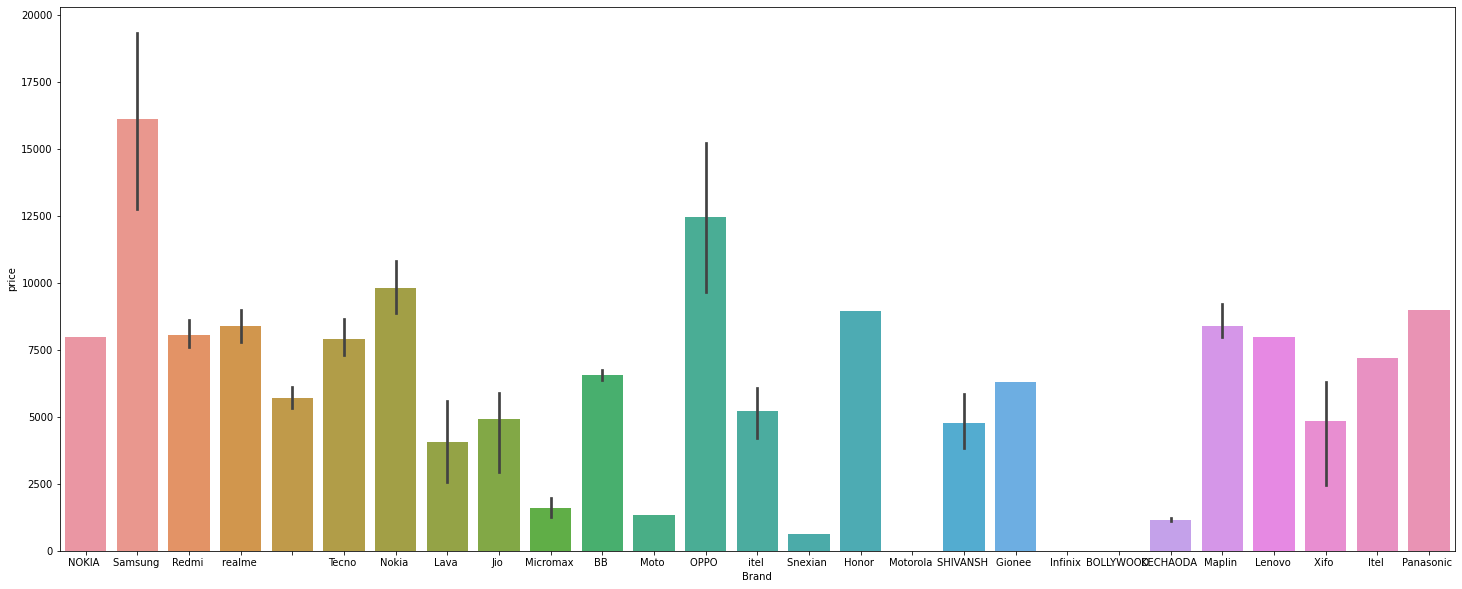

In [51]:
plt.figure(figsize=(25, 10))
sns.barplot(x = df.Brand, y = df.price)

<AxesSubplot:xlabel='color', ylabel='count'>

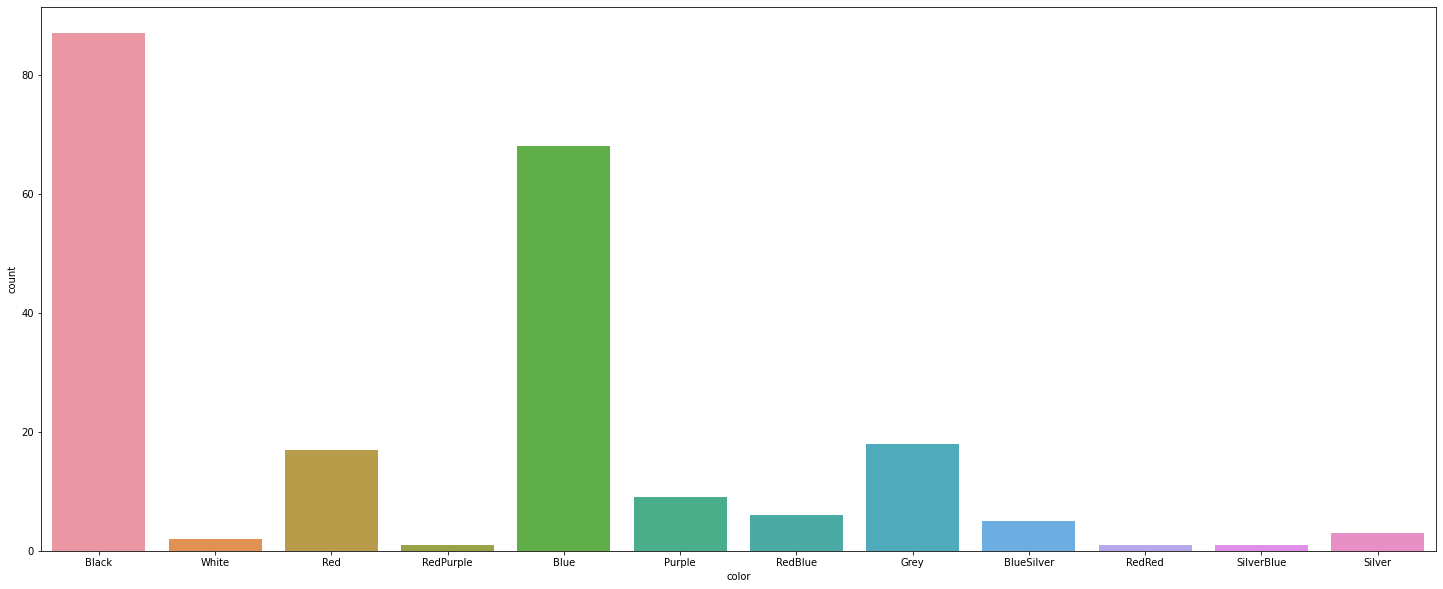

In [67]:
#most liked color
plt.figure(figsize=(25, 10))
sns.countplot(x = df.color)

<AxesSubplot:xlabel='Brand'>

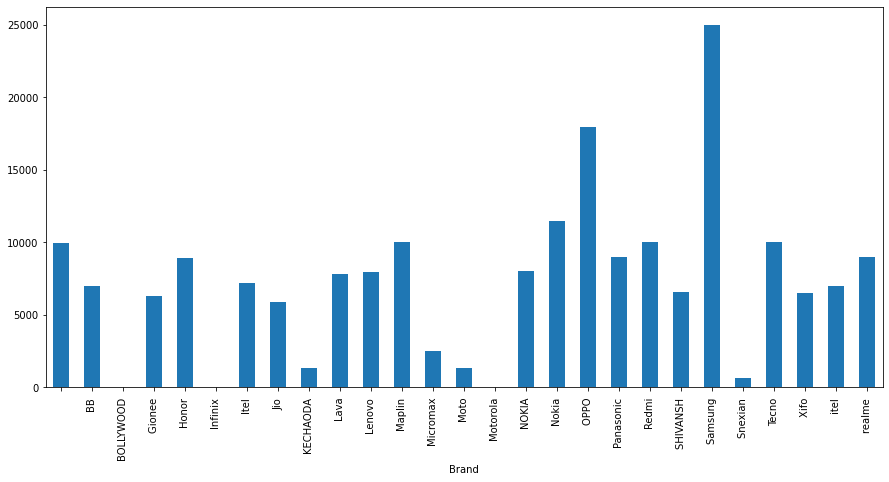

In [78]:
plt.figure(figsize=(15, 7))
df.groupby(['Brand'])['price'].max().plot(kind='bar')

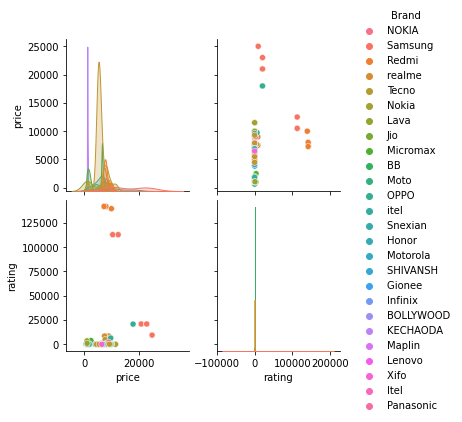

In [71]:
#To plot multiple pairwise bivariate distributions in a dataset, you can use the pairplot() function.
sns.pairplot(df,hue = 'Brand',diag_kind = "kde",kind = "scatter",palette = "husl")
plt.show()

<AxesSubplot:xlabel='price', ylabel='Count'>

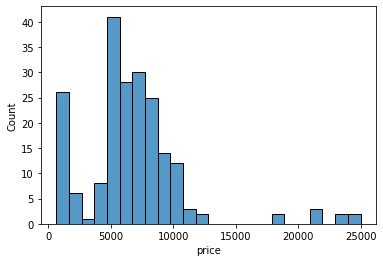

In [76]:
#Histograms are visualization tools that represent the distribution of a set of continuous data.
sns.histplot(data = df, x = "price")


In [84]:
df.Brand = df['Brand'].replace('','Refurbished')

<AxesSubplot:xlabel='Brand', ylabel='count'>

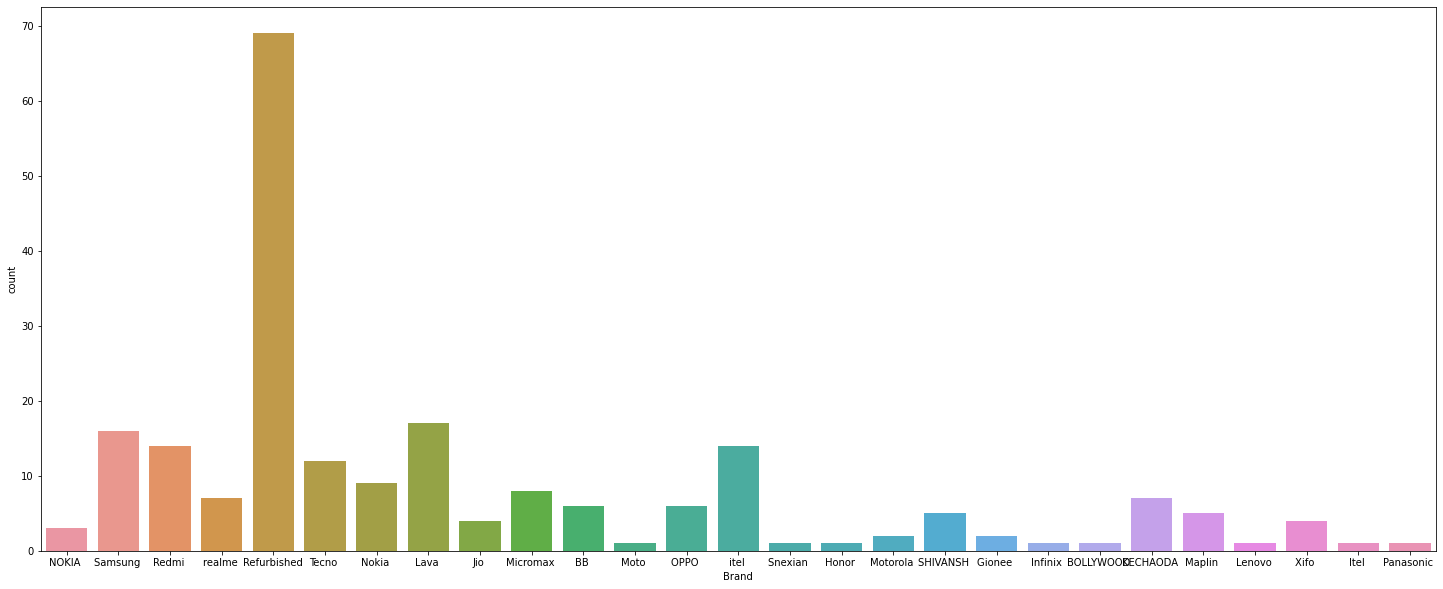

In [88]:
#seaborn.countplot() method is used to Show the counts of observations in each categorical bin using bars.
plt.figure(figsize=(25, 10))
sns.countplot(x='Brand',data=df)